# Preprocessing & Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', None)

### Data breakdown

In [33]:
df = pd.read_csv("data/df_clean.csv", index_col=0)
df.columns

Index(['Strain', 'Rating', 'NumReviews', 'Strain_description', 'THC', 'Lean',
       'Sweet', 'Strawberry', 'Earthy', 'Cheese', 'Sage', 'Honey', 'Rose',
       'Tree', 'Violet', 'Coffee', 'Pear', 'Spicy/Herbal', 'Tropical',
       'Pungent', 'Tea', 'Apricot', 'Mint', 'Pepper', 'Flowery', 'Ammonia',
       'Blueberry', 'Berry', 'Chemical', 'Pine', 'Woody', 'Lime', 'Plum',
       'Nutty', 'Fruit', 'Citrus', 'Orange', 'Mango', 'Diesel', 'Lemon',
       'Pineapple', 'Apple', 'Grape', 'Menthol', 'Chestnut', 'Skunk',
       'Grapefruit', 'Blue', 'Peach', 'Butter', 'Lavender', 'Tar', 'Tobacco',
       'Vanilla', 'Eff_Focused', 'Med_Inflammation', 'Eff_Dizzy',
       'Eff_Energetic', 'Eff_Dry_eyes', 'Med_Lack_of_appetite', 'Eff_Happy',
       'Eff_Creative', 'Med_Muscle_spasms', 'Eff_Sleepy', 'Med_Stress',
       'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious', 'Med_Nausea', 'Med_Fatigue',
       'Med_Cramps', 'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative',
       'Eff_Paranoid', 'Eff_Hungry', 'Ef

Our clean df now has six aspects we can focus on.

Numerical (scaled between 0:1): THC, Lean, Rating_scaled, Num_reviews_scaled

Categorical (0 or 1): Flavours

Categorical/Numerical (0-1): Effects, Medical

Before we do any further investigation, let's plot each of these seven elements by themselves.

### Graph: THC values, Ratings, Lean, Num_reviews

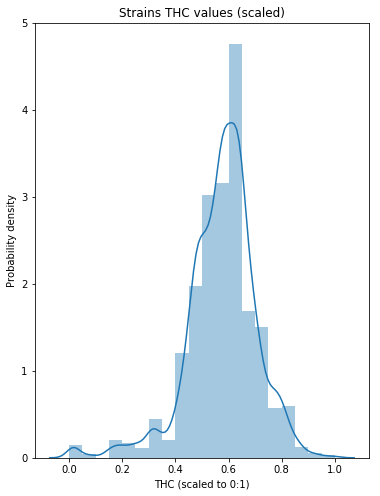

In [3]:
plt.figure(figsize=(6,8))
sns.distplot(df['THC_scaled'], bins=20)
plt.ylabel('Probability density')
plt.xlabel('THC (scaled to 0:1)')
plt.title("Strains THC values (scaled)")
plt.show();

In [71]:
sativa_count = len(df[df.Lean <= 0.35])
indica_count = len(df[df.Lean >= 0.65])
hybrid_count = 2706-sativa_count-indica_count
print(sativa_count, hybrid_count, indica_count)

539 1429 738


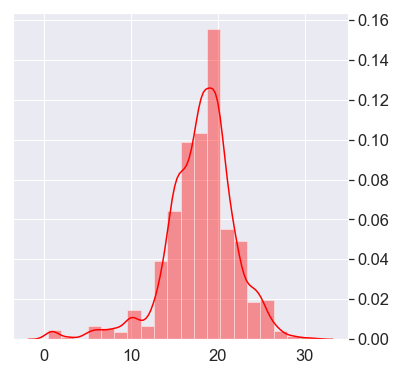

In [90]:
# THIS IMAGE TO BE USED FOR DEMO DAY
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(6,6))
figure = sns.distplot(df['THC'], bins=20, color='red')
plt.xlabel(xlabel=None) #'THC (%)', fontsize=16)
# plt.title("Strains THC values", fontsize=16)
# plt.ylabel('Strains', fontsize=16)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
ax.yaxis.tick_right()
# ax.set
# ax.yaxis.set_ticks_position('both')
plt.show()
figure.figure.savefig('graphs/THC2')

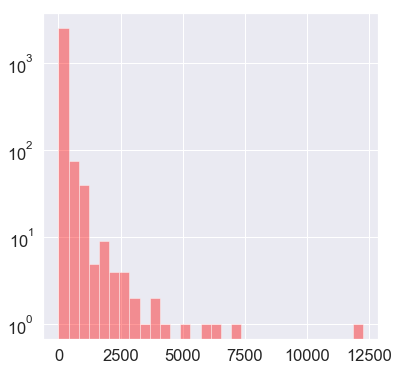

In [98]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(6,6))
figure = sns.distplot(df['NumReviews'], kde=False, bins=30, color='red')
plt.xlabel(xlabel=None)
# plt.ylabel('Probability density (log)')
plt.yscale('log')
# plt.xlabel('Number of reviews (scaled to 0:1)')
# plt.title('Strain popularity (number of reviews (scaled)')
plt.show()
figure.figure.savefig('graphs/Num_reviews')

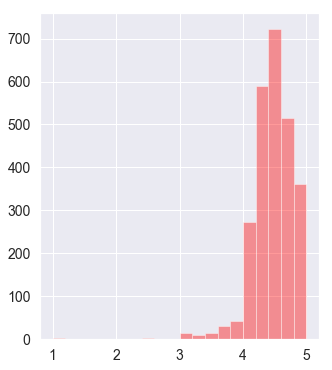

In [125]:
# THIS IMAGE TO BE USED FOR DEMO DAY
plt.figure(figsize=(5,6))
figure = sns.distplot(df['Rating'], kde=False, bins=20, color='red')
# plt.ylabel('Strains', fontsize=16)
plt.xlabel(xlabel=None) #'THC (%)', fontsize=16)
# plt.title("Strains THC values", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
figure.figure.savefig('graphs/Ratings')

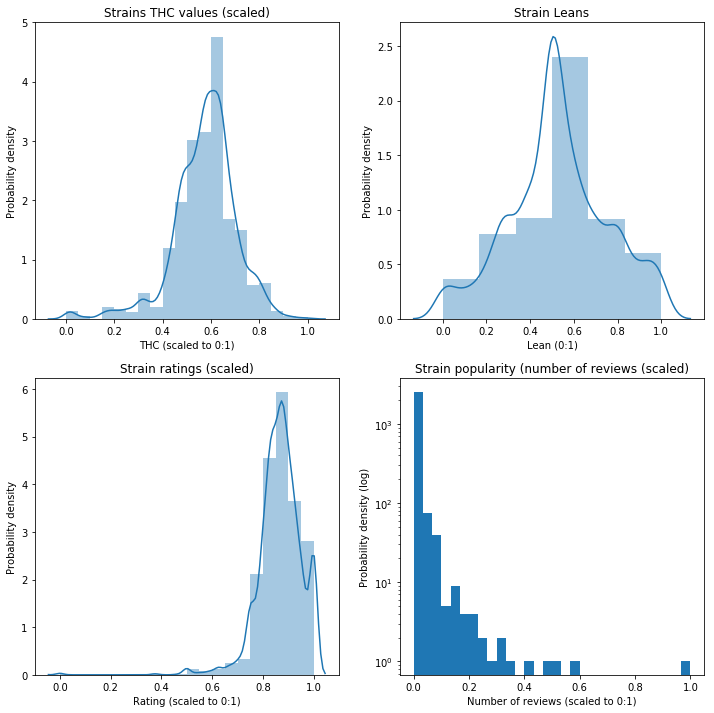

In [4]:
# We'll use this later:
numerical_cols = ['Lean', 'THC_scaled', 'Rating_scaled', 'Num_reviews_scaled']

plt.figure(figsize=(12,12))

# THC
plt.subplot(2,2,1)
sns.distplot(df['THC_scaled'], bins=20)
plt.ylabel('Probability density')
plt.xlabel('THC (scaled to 0:1)')
plt.title("Strains THC values (scaled)")

# Lean
plt.subplot(2,2,2)
sns.distplot(df['Lean'], bins=6, )
plt.ylabel('Probability density')
plt.xlabel('Lean (0:1)')
plt.title("Strain Leans")       

# Ratings
plt.subplot(2,2,3)
sns.distplot(df['Rating_scaled'], bins=20)
plt.ylabel('Probability density')
plt.xlabel('Rating (scaled to 0:1)')
plt.title('Strain ratings (scaled)')

# Number of Reviews
plt.subplot(2,2,4)
plt.hist(df['Num_reviews_scaled'], bins=30)
# sns.distplot(df['Num_reviews_scaled'], bins=50)
plt.ylabel('Probability density (log)')
plt.yscale('log')
plt.xlabel('Number of reviews (scaled to 0:1)')
plt.title('Strain popularity (number of reviews (scaled)')
 
plt.show();

### Graph: Flavours, Effects, Medicals

In [171]:
flav_counts.index

Index(['Earthy', 'Sweet', 'Citrus', 'Pungent', 'Berry', 'Woody', 'Pine',
       'Flowery', 'Spicy/Herbal', 'Diesel', 'Lemon', 'Skunk', 'Tropical',
       'Blueberry', 'Grape', 'Orange', 'Cheese', 'Pepper', 'Mint', 'Sage',
       'Lime', 'Strawberry', 'Lavender', 'Pineapple', 'Chemical', 'Grapefruit',
       'Nutty', 'Fruit', 'Tree', 'Vanilla', 'Honey', 'Mango', 'Ammonia',
       'Coffee', 'Menthol', 'Apple', 'Rose', 'Butter', 'Tea', 'Tar', 'Blue',
       'Tobacco', 'Peach', 'Violet', 'Apricot', 'Plum', 'Chestnut', 'Pear'],
      dtype='object')

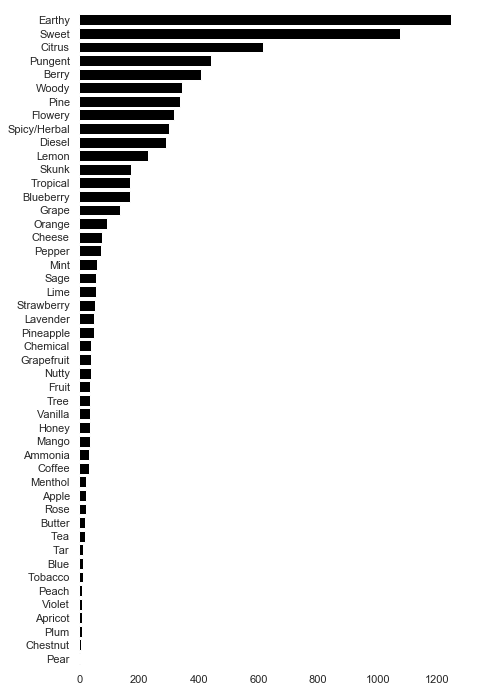

In [167]:
# Flavours
flavours = ['Sweet', 'Strawberry', 'Earthy', 'Cheese', 'Sage', 'Honey', 'Rose',
       'Tree', 'Violet', 'Coffee', 'Pear', 'Spicy/Herbal', 'Tropical',
       'Pungent', 'Tea', 'Apricot', 'Mint', 'Pepper', 'Flowery', 'Ammonia',
       'Blueberry', 'Berry', 'Chemical', 'Pine', 'Woody', 'Lime', 'Plum',
       'Nutty', 'Fruit', 'Citrus', 'Orange', 'Mango', 'Diesel', 'Lemon',
       'Pineapple', 'Apple', 'Grape', 'Menthol', 'Chestnut', 'Skunk',
       'Grapefruit', 'Blue', 'Peach', 'Butter', 'Lavender', 'Tar', 'Tobacco',
       'Vanilla']

# Get counts of each flavour
sns.set(style="white")
flav_counts = df[flavours].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(7,12))
figure = sns.barplot(y=flav_counts.index, x=flav_counts, color='black')
sns.despine(left=True, bottom=True)
ax.set_xlabel('')
# ax.yaxis.tick_right()
# plt.yticks(fontsize=14)
# plt.xlabel('Counts')
# plt.title('Flavours')
plt.show();
figure.figure.savefig('Flavours_bw')

In [153]:
# import squarify
# treelabels = list(flav_counts.index[0:21])
# plt.figure(figsize=(14,10))
# figure = squarify.plot(sizes=flav_counts, label=treelabels, color=["lightgreen","lightblue", "lightgrey", "magenta", "yellow", "orange", ])
# plt.axis('off')
# plt.show();
# figure.figure.savefig('flavour_treemap')

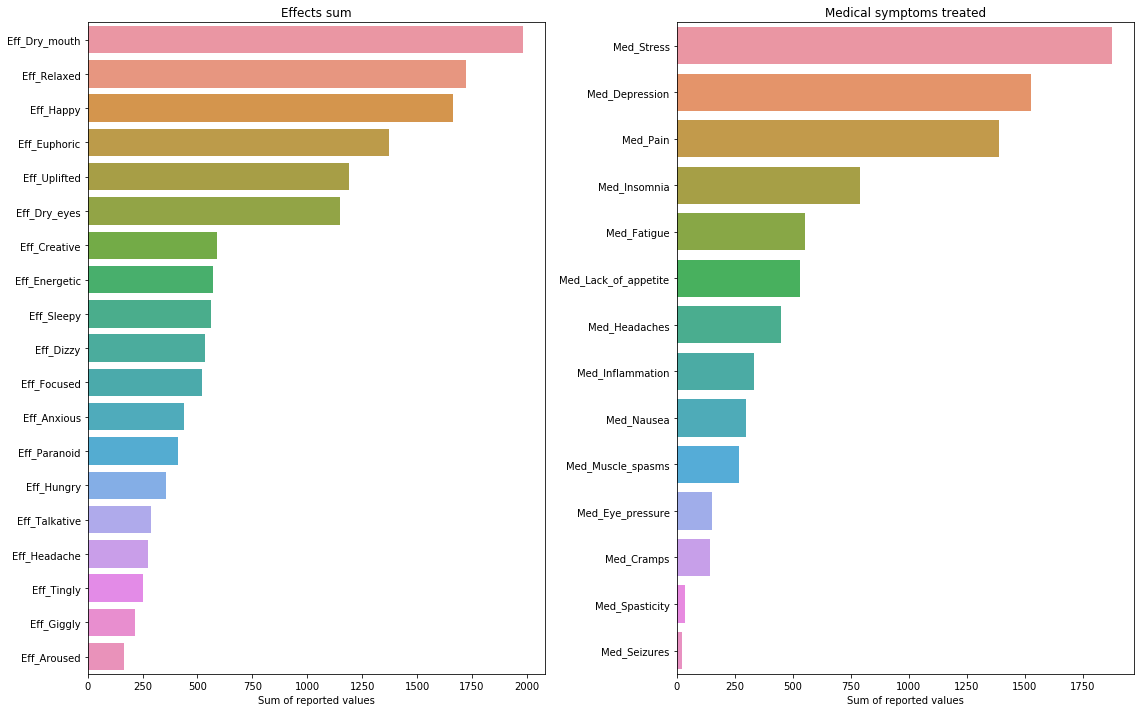

In [6]:
# Effects & Medical
effects = ['Eff_Focused', 'Eff_Dizzy', 'Eff_Energetic', 'Eff_Dry_eyes', 'Eff_Happy',\
           'Eff_Creative', 'Eff_Sleepy', 'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious',\
           'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative', 'Eff_Paranoid', 'Eff_Hungry',\
           'Eff_Giggly', 'Eff_Relaxed',  'Eff_Euphoric', 'Eff_Dry_mouth']

medicals = ['Med_Inflammation', 'Med_Lack_of_appetite', 'Med_Stress', 'Med_Muscle_spasms',\
            'Med_Nausea', 'Med_Fatigue', 'Med_Cramps', 'Med_Depression', 'Med_Pain', 'Med_Seizures',\
            'Med_Spasticity', 'Med_Eye_pressure', 'Med_Headaches', 'Med_Insomnia']

# Get aggregate sums for each effect/medical symptom
effect_sum = df[effects].sum().sort_values(ascending=False)
medical_sum = df[medicals].sum().sort_values(ascending=False)

plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
sns.barplot(y=effect_sum.index, x=effect_sum)
plt.xlabel('Sum of reported values')
plt.title('Effects sum')

plt.subplot(1,2,2)
sns.barplot(y=medical_sum.index, x=medical_sum)
plt.xlabel('Sum of reported values')
plt.title('Medical symptoms treated')
plt.tight_layout()
plt.show();

### Threshold Num_reviews (5 reviews min). Data cleanup. Re-index on strain.

We can also get a smaller df, df_top200, which contains the top 200 strains (highest Num_reviews) (300 reviews + per strain).

In [7]:
# df_top200 = df['NumReviews'].sort_values(ascending=False)[0:200]
df_top200 = df[df.NumReviews > 300]

Alternative, we can set a more permissive threshold for NumReviews - say, a minimum of 5. Let's first graph reviews under 100 reviews to see the review curve.

498


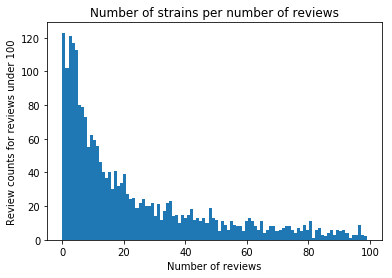

In [8]:
# Selecting 5+ 10+ reviews leaves us 2130 reviews. 10+ >> 1781, 20+ >> 1366 30+ >> 1124

review_max_threshold = 100
df_short = df[df['NumReviews']<review_max_threshold]
print(len(df)-len(df_short))

plt.figure()
plt.hist(df_short['NumReviews'], bins=review_max_threshold)
plt.xlabel('Number of reviews')
plt.ylabel(f'Review counts for reviews under {review_max_threshold}')
plt.title('Number of strains per number of reviews')
plt.show();

This graph looks like a pretty typical decay curve. Let's try setting a minimum threshold of 5 reviews for our analysis.

In [9]:
# df_mr = df "min plus" - minimum reviews


review_min_threshold = 5
df_mr = df[df['NumReviews']>=review_min_threshold]
df_mr.drop('Strain_description', axis=1, inplace=True)
df_mr.drop('NumReviews', axis=1, inplace=True)
df_mr.drop('Rating', axis=1, inplace=True)
df_mr.drop('THC', axis=1, inplace=True)
df_mr.set_index('Strain', inplace=True)
# df_mr.drop('Strain', axis=1, inplace=True)
print(len(df_mr))
df_mr.head()

# Also add a "Strain_type" column ("Type" is a reserved python word) for Strain_typeification
df_mr.loc[df_mr.Lean <= 0.35, 'Strain_type'] = 'sativa'
df_mr.loc[((df_mr.Lean > 0.35) & (df_mr.Lean < 0.65)), 'Strain_type'] = 'hybrid'
df_mr.loc[df_mr.Lean >= 0.65, 'Strain_type'] = 'indica'
df_mr['Strain_type'].value_counts()

2130


hybrid    1103
indica     600
sativa     427
Name: Strain_type, dtype: int64

### Graph: Heatmaps of flavours, effects, medical

Now we can look at their interactions (heatmaps).

In [10]:
# First, set up any general parameters for our heatmaps:

palette = sns.color_palette("RdBu", 7) # Specify a red-blue divergent palette

For Flavours - 0 or 1 categorical data - let's try computing a matrix of Thiel's U - the Uncertainty Coefficient - which will give us the conditional entropy between two flavours. We'll use this because this is asymmetric - it will give different values for - for example - "citrus" strains that are also "orange", and "orange" strains that are also "citrus"

NOTE: A flavours correlation matrix would be blank due to the data being categorical. We'll visualize this information further down below.

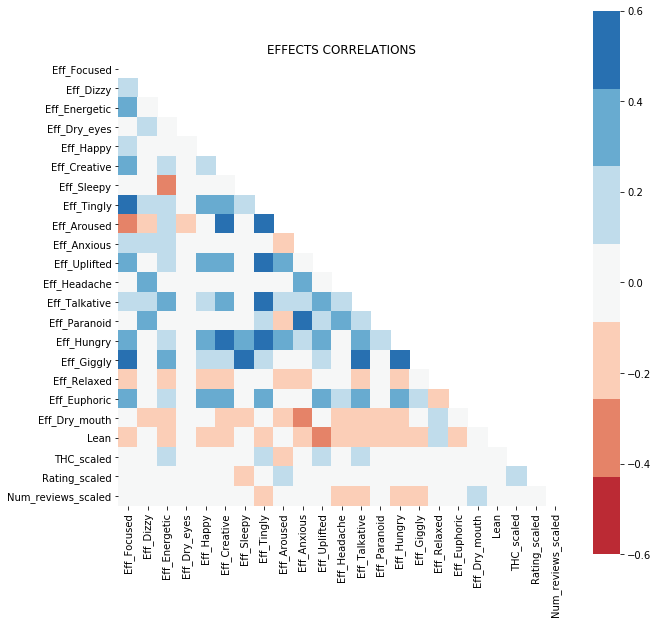

In [11]:
effects_plus = effects + numerical_cols

df_eff_corr = df_mr[effects_plus].corr()
# df_eff_corr = df_top200[effects_plus].corr()

# Make a mask, showing only a triangle (no repeated data)
trianglemask = np.zeros_like(df_eff_corr, dtype=np.bool)
trianglemask[np.triu_indices_from(trianglemask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(df_eff_corr, vmin=-0.6, vmax=0.6, square=True, mask=trianglemask, cmap=palette)
plt.title('EFFECTS CORRELATIONS')
plt.show();

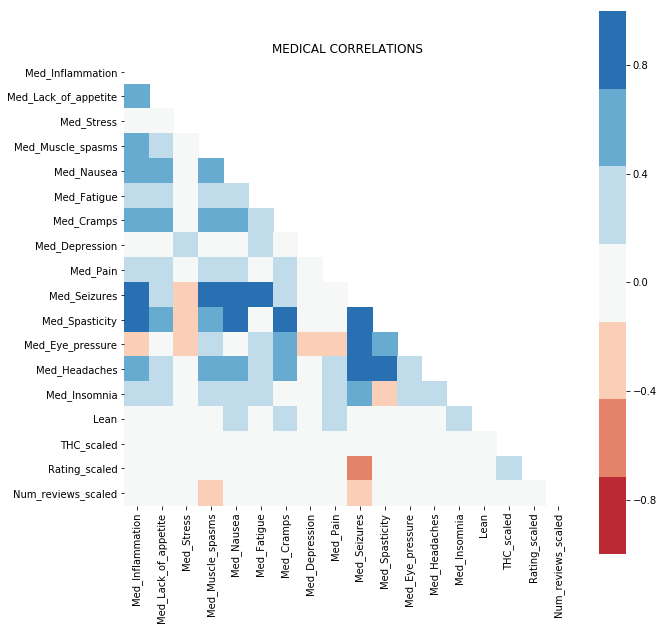

In [12]:
medicals_plus = medicals + numerical_cols
df_med_corr = df_mr[medicals_plus].corr()
# df_med_corr = df_top200[medicals_plus].corr()

# Make a mask, showing only a triangle (no repeated data)
trianglemask = np.zeros_like(df_med_corr, dtype=np.bool)
trianglemask[np.triu_indices_from(trianglemask)] = True

f = plt.figure(figsize=(10,10))

# SET X AND Y AXIS TO TOP AND RIGHT
# ax = f.add_subplot(111)
# ax.yaxis.tick_right()
# ax.xaxis.tick_top()

# NOT SURE HOW TO SET THE LOCATION OF THE COLORBAR, CBAR_AX

# MAKE X TICKS
# CHANGE PARAMETERS MORE GENERALLY (PERMANENTLY)
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

sns.heatmap(df_med_corr, vmin=-1, vmax=1, square=True, mask=trianglemask, cmap=palette)
plt.title('MEDICAL CORRELATIONS')
plt.show();

### Pairplots: Lean, Rating, THC

Let's check some pairplots for Lean, Rating, THC, and NumReviews.

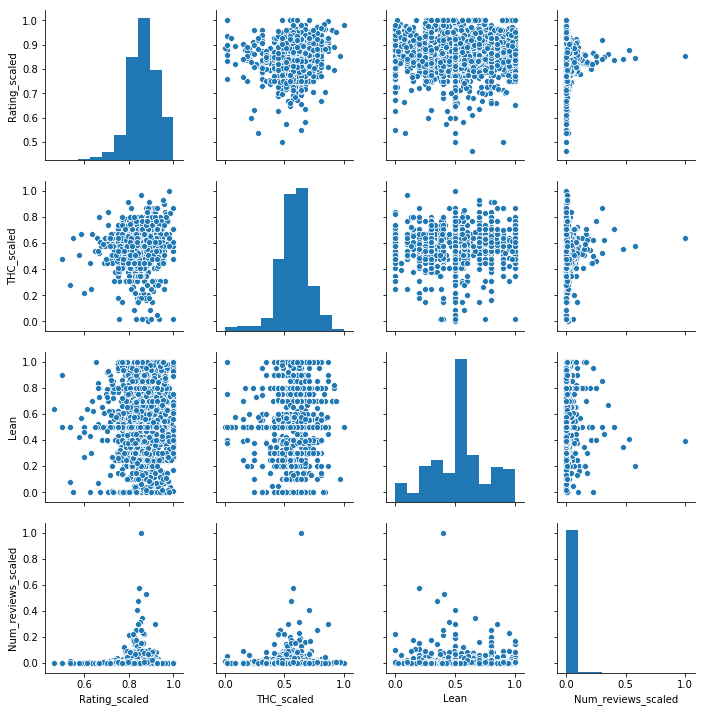

In [13]:
df_mr_small = df_mr[['Rating_scaled', 'THC_scaled', 'Lean', 'Num_reviews_scaled']]
sns.pairplot(df_mr_small)

These pairplots show no obvious trends, at least none noticable to me.

### Pairplots: Effects, Medicals

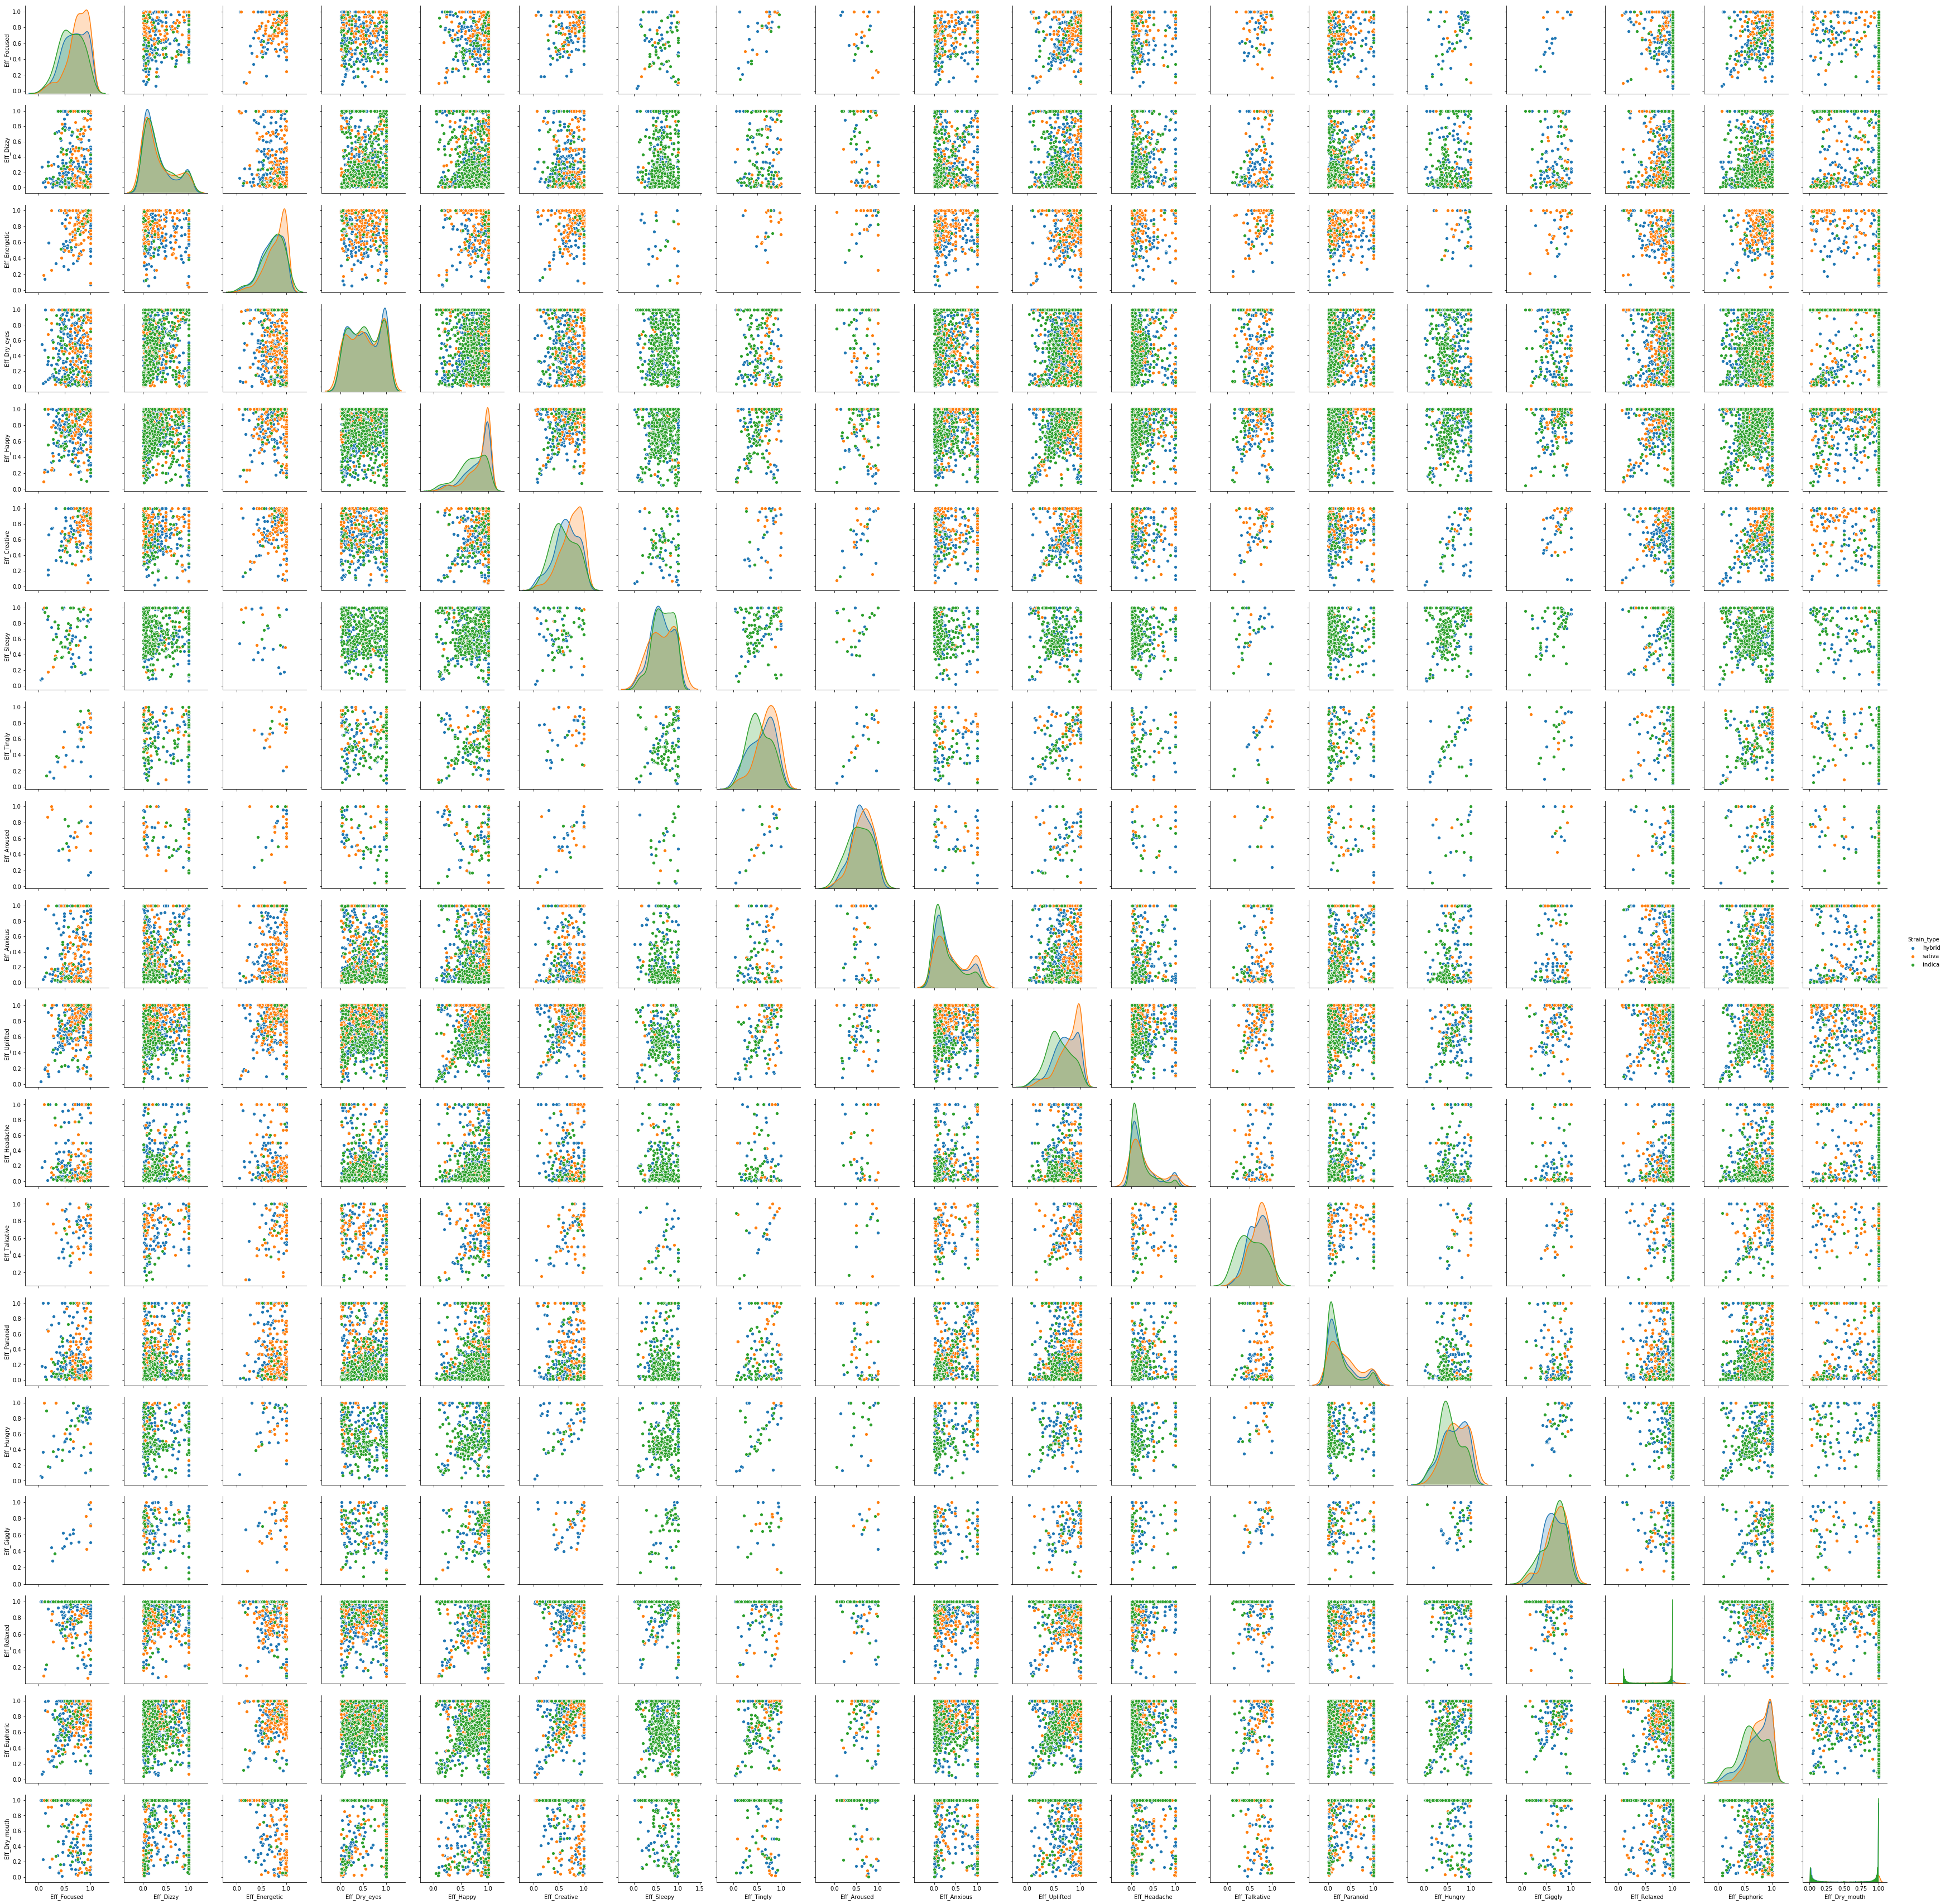

In [14]:
# Effects Pairplots
df_effects = df_mr[effects]
df_effects['Strain_type'] = df_mr['Strain_type']
pairplot = sns.pairplot(df_effects, hue='Strain_type')
# pairplot = sns.pairplot(df_effects, kind='reg', hue='Strain_type', diag_kind='kde')
pairplot.savefig('graphs/Effect_pairplots')

In [15]:
df_effects.columns

Index(['Eff_Focused', 'Eff_Dizzy', 'Eff_Energetic', 'Eff_Dry_eyes',
       'Eff_Happy', 'Eff_Creative', 'Eff_Sleepy', 'Eff_Tingly', 'Eff_Aroused',
       'Eff_Anxious', 'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative',
       'Eff_Paranoid', 'Eff_Hungry', 'Eff_Giggly', 'Eff_Relaxed',
       'Eff_Euphoric', 'Eff_Dry_mouth', 'Strain_type'],
      dtype='object')

In [16]:
# adjusted_mutual_info_score

info_scores = []

for column in df_effects.columns[0:-1]:
    info_score = adjusted_mutual_info_score(df_effects[column], df_effects['Strain_type'])
    info_scores.append(info_score)

# plt.figure()
# plt.bar(X_train.columns, info_scores)
# plt.xticks(rotation=90)
# plt.show();     

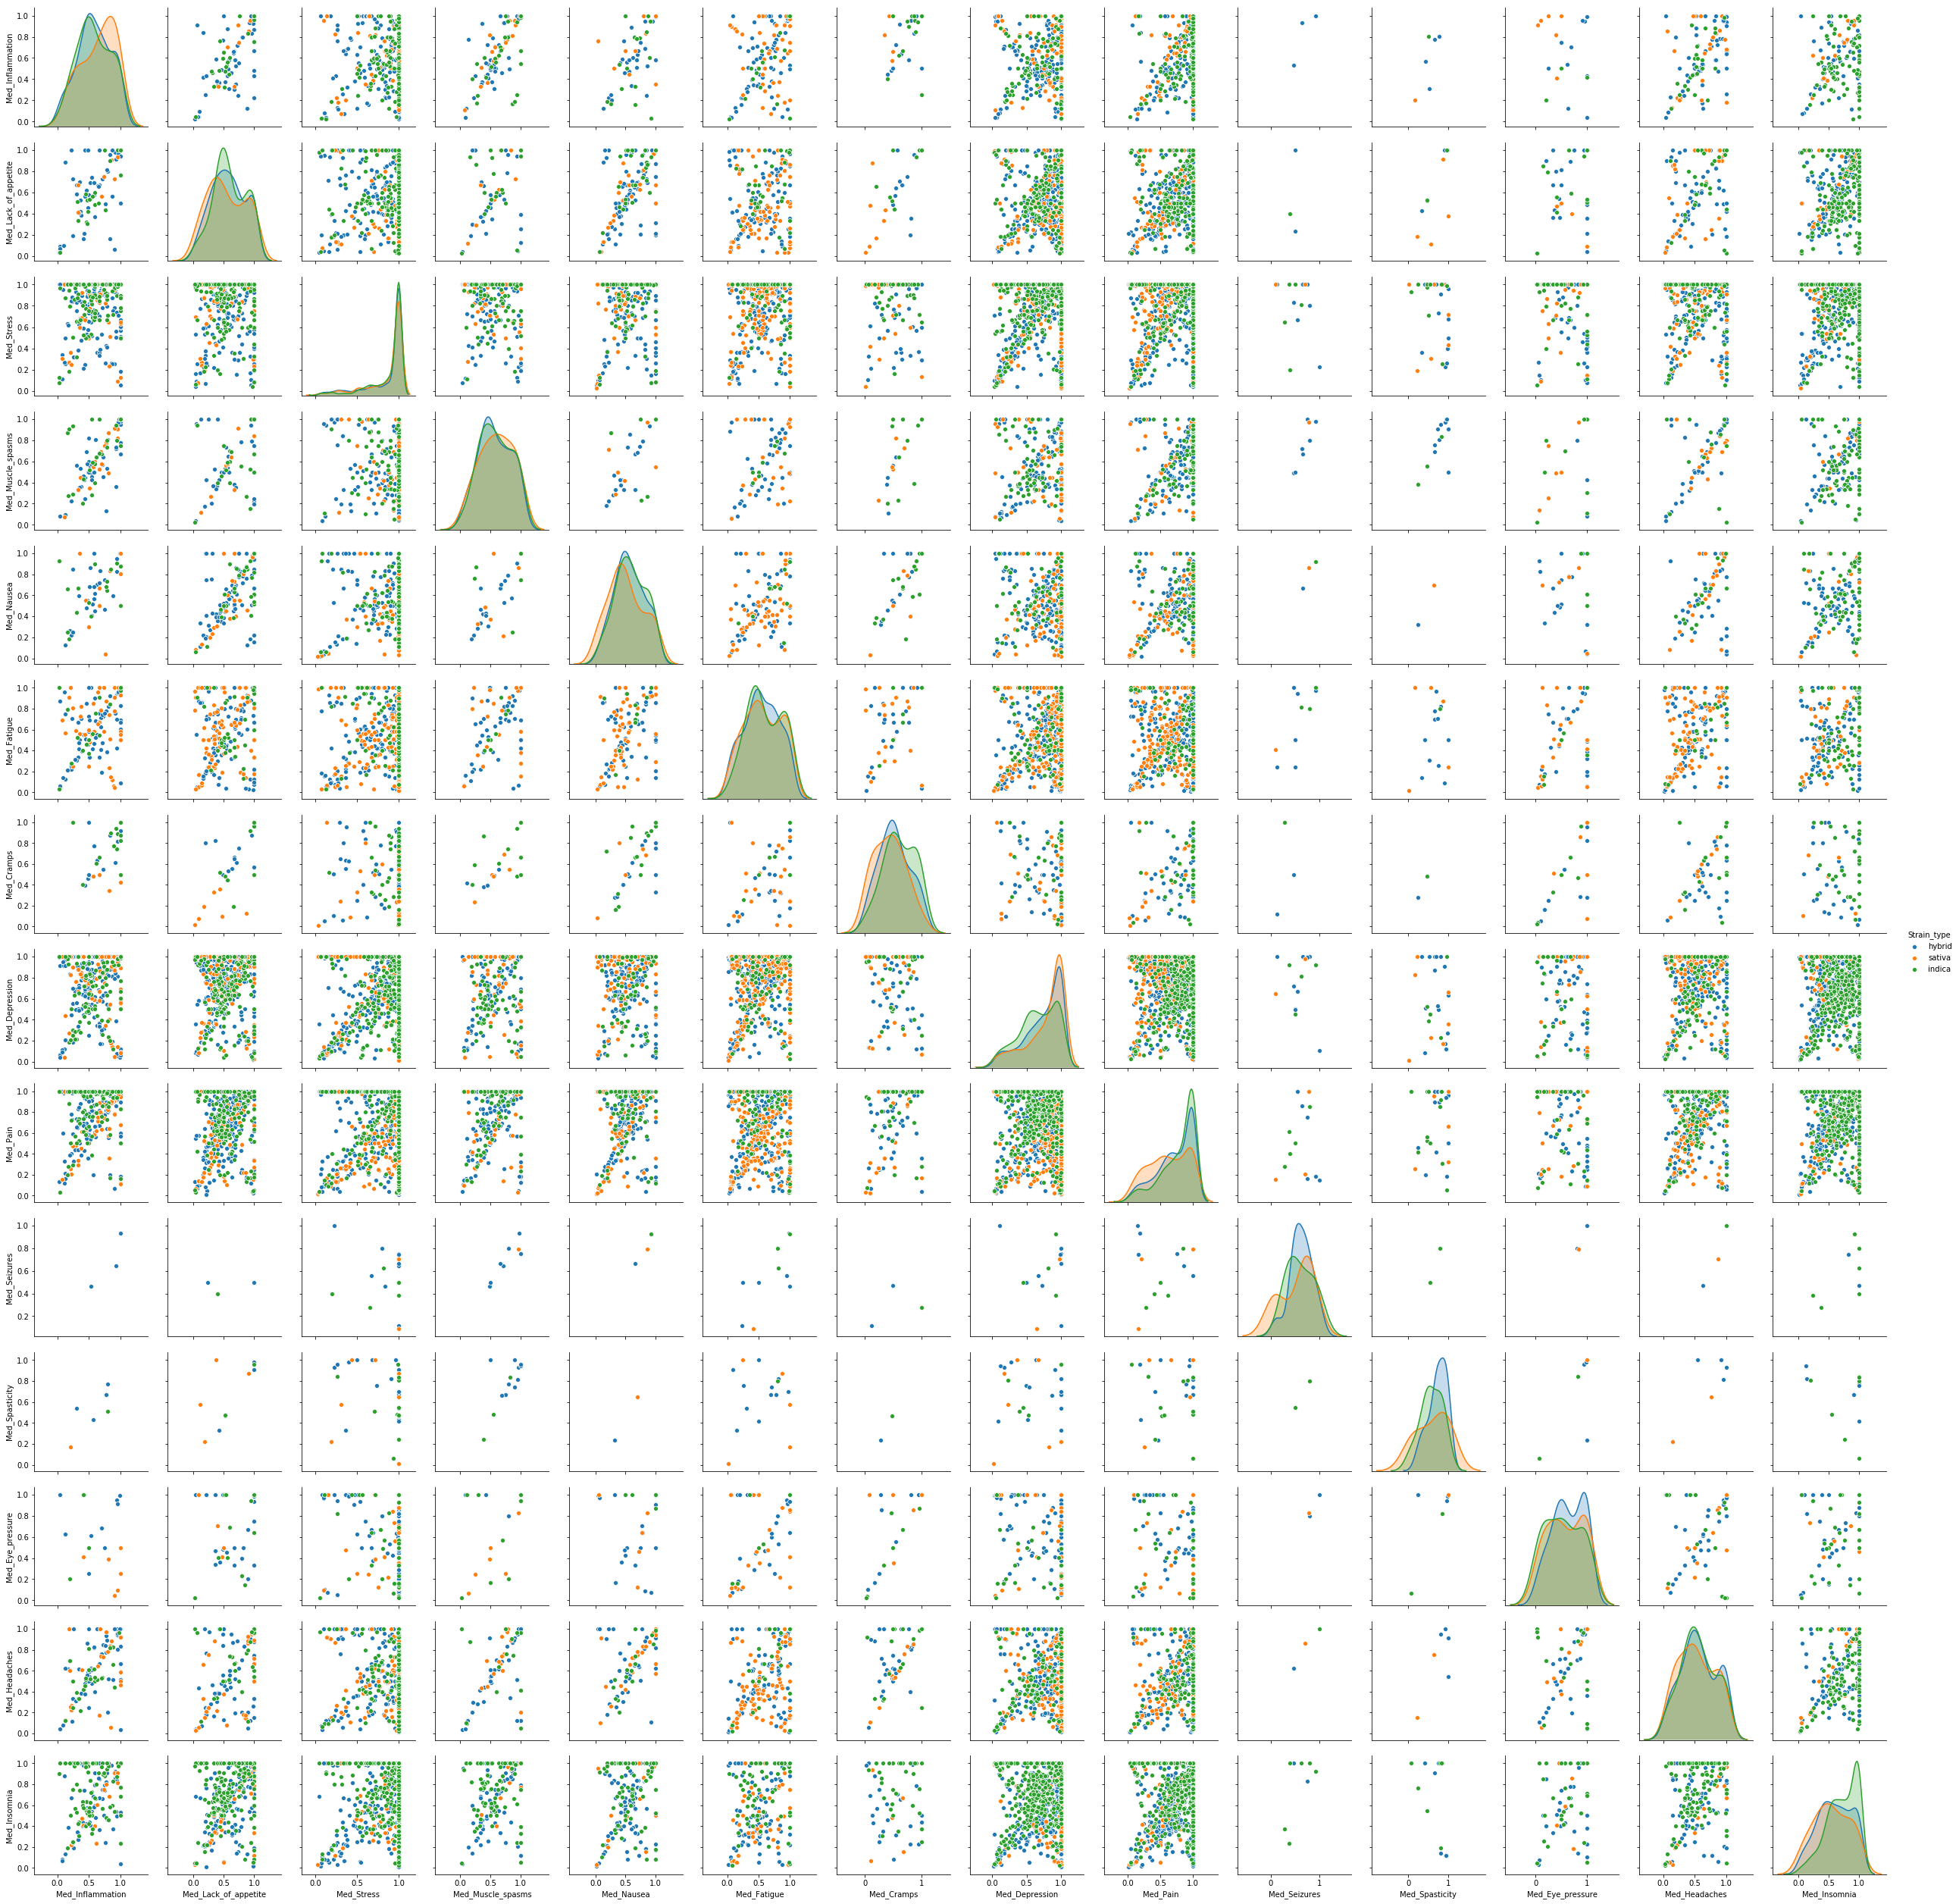

In [17]:
# Medicals Pairplots
df_medicals = df_mr[medicals]
df_medicals['Strain_type'] = df_mr['Strain_type']
pairplot = sns.pairplot(df_medicals, hue='Strain_type')
pairplot.savefig('graphs/Medicals_pairplots')

Seeing as flavours have 48 factors I will skip its pairplot. I will study their correlation/mutual information below.

### Apply Stanadard Scaler

In [18]:
df_mr.columns

Index(['Lean', 'Sweet', 'Strawberry', 'Earthy', 'Cheese', 'Sage', 'Honey',
       'Rose', 'Tree', 'Violet', 'Coffee', 'Pear', 'Spicy/Herbal', 'Tropical',
       'Pungent', 'Tea', 'Apricot', 'Mint', 'Pepper', 'Flowery', 'Ammonia',
       'Blueberry', 'Berry', 'Chemical', 'Pine', 'Woody', 'Lime', 'Plum',
       'Nutty', 'Fruit', 'Citrus', 'Orange', 'Mango', 'Diesel', 'Lemon',
       'Pineapple', 'Apple', 'Grape', 'Menthol', 'Chestnut', 'Skunk',
       'Grapefruit', 'Blue', 'Peach', 'Butter', 'Lavender', 'Tar', 'Tobacco',
       'Vanilla', 'Eff_Focused', 'Med_Inflammation', 'Eff_Dizzy',
       'Eff_Energetic', 'Eff_Dry_eyes', 'Med_Lack_of_appetite', 'Eff_Happy',
       'Eff_Creative', 'Med_Muscle_spasms', 'Eff_Sleepy', 'Med_Stress',
       'Eff_Tingly', 'Eff_Aroused', 'Eff_Anxious', 'Med_Nausea', 'Med_Fatigue',
       'Med_Cramps', 'Eff_Uplifted', 'Eff_Headache', 'Eff_Talkative',
       'Eff_Paranoid', 'Eff_Hungry', 'Eff_Giggly', 'Med_Depression',
       'Eff_Relaxed', 'Med_Pain', 'Med_Se

In [19]:
df_mr.fillna("0", inplace=True) # Fill NaNs

X = df_mr.drop('Strain_type', axis=1).values # Define X (all columns of our DF)

X = StandardScaler().fit_transform(X) # Apply StandardScaler (mean=0, var=1)
df_scaled = pd.DataFrame(X, columns = df_mr.drop('Strain_type', axis=1).columns)

We now have both mr_df and df_scaled available for analysis. 

### PCA (OMITTED)

Transform by PCA.

In [20]:
# my_pca = PCA(n_components=2) # n_components= is optional
# X = my_pca.fit_transform(df_scaled.values)
# df_PCA = pd.DataFrame(data=my_pca.components_, columns=df_mr.columns)

# print(my_pca.components_[0])
# print(my_pca.explained_variance_)

# df_PCA

# # Plot the first 2 components
# # plt.scatter(df_PCA.iloc[0], df_PCA.iloc[1])

### Correlation / Mutual-Information

At this point we want to further investigate the correlation between columns of data so we can drop and/or bucket columns to improve our model.

Let's start with Pearson's correlation test (r^2). As scaling is not required (and all values are between 0-1 anyway) we can use df_mr.

In [21]:
print(len(df_mr.columns))

86


We have 85 numerical columns in our df.

In [22]:
df_mr_nona = df_mr.fillna(0)

In [23]:
# Get correlation and pval for pairwise combination

corr_list = []
pval_list = []

df_temp = df_mr_nona.drop('Strain_type', axis=1)

for column in df_temp: # For each column
    x = df_temp[column]
#     print(x.name)
    for column in df_temp: # For each column (again)
        y = df_mr_nona[column]
        corr_coeff, pval = stats.pearsonr(x,y) # Get, add corr and pval
        corr_list.append(corr_coeff)
        pval_list.append(pval)

print(len(corr_list))

TypeError: can only concatenate str (not "float") to str

Now take the list of correlations and p-values, transform them into (85,85) arrays, and graph them.

In [ ]:
# corr_list -> corr_array
corr_array = np.asarray(corr_list)
corr_array = np.resize(corr_array,(85,85))

In [ ]:
# pval_list -> pval_array
pval_array = np.asarray(pval_list)
pval_array = np.resize(pval_array,(85,85))

In [ ]:
corr_array.shape

### Graph: Heatmaps of correlations, pvals

In [ ]:
palette_sig = sns.color_palette("Blues_d", 2) # Specify a red-blue divergent palette # Blues_d, Set1

In [ ]:
# Make a new palette that will show all correlations larger/smaller than 0.1
palette = sns.color_palette("RdBu", 5) # Specify a red-blue divergent palette

In [ ]:
# Get labels for our heatmap - we'll use df_temp, since this has 85 columns (no Strain_type)
df_corrs = pd.DataFrame(corr_array)
df_corrs.columns = df_temp.columns
df_corrs.index = df_temp.columns

df_pvals = pd.DataFrame(pval_array)
df_pvals.columns = df_temp.columns
df_pvals.index = df_temp.columns

In [ ]:
trianglemask = np.zeros_like(corr_array, dtype=np.bool)
trianglemask[np.triu_indices_from(trianglemask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(df_corrs, vmin=-0.5, vmax=0.5, square=True, cmap=palette, mask=trianglemask)
plt.title('Correlations for df_mr')
plt.show();

In [ ]:
trianglemask = np.zeros_like(pval_array, dtype=np.bool)
trianglemask[np.triu_indices_from(trianglemask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(df_pvals, vmin=0.09, vmax=0.11, square=True, cmap=palette_sig, mask=trianglemask)
plt.title('P-values for correlations of df_mr')
plt.show();

Now we can make a mask based on our pvalues for our correlations so we can only see significant ones. Let's set a cutoff at p=0.1, to be generous.

In [ ]:
# Get corr_mask for a given p_threshold
p_threshold = 0.1
corr_mask_list = []

for i in range(0,85):
    for j in range(0,85):
        pval = df_pvals.iloc[i, j]
        if pval < p_threshold: # If p is low
            corr = False # No mask
        else:
            corr = True # Otherwise, mask
        corr_mask_list.append(corr)

corr_mask = np.asarray(corr_mask_list)
corr_mask = np.resize(corr_mask, (85,85)) # Convert the list to an array

# Correlations with p-val and triangle mask
# trianglemask = np.zeros_like(corr_array, dtype=np.bool)
# trianglemask[np.triu_indices_from(trianglemask)] = True
# the_mask = trianglemask + corr_mask
the_mask = corr_mask

plt.figure(figsize=(20,20))
corr_map = sns.heatmap(df_corrs, vmin=-0.5, vmax=0.5, square=True, cmap=palette, mask=the_mask)
plt.title('Correlations for df_mr, p < 0.01')
plt.show()
corr_map.figure.savefig('graphs/corr_df_mr')

In [ ]:
len(df_mr['Med_Headaches'][df_mr['Med_Headaches'].values>0])

From this heatmap we see a lot of statistically relevant correlation in the lower-right triangle (Med/Eff) and Lean. Flavours, not so much in general, although some flavours, such as citrus, berry, earthy, and tropical.

Let's drop the columns with minimal correlation other columns (i.e. the "noise"). We'll define this as any parameter with under 4 correlations, with all correlations being in the smallest range (less than -0.1 or greater than 0.1)

We can also bucket flavours that are correlated (e.g. "citrus" and "orange") as long as they are both anti-correlated to another flavour (e.g. "earthy).

The total DB is 2130 items long. 5% of this DB is 107. Let's assume that anything under 5% that does not correlate with at least 5 other columns is OK to drop - it is so small a cluster that we can remove it from our model since we're interested in identifying major clusters.

Drop flavours: (counts in df)
- Ammonia: 23
- Apricot: 6
- Blue Cheese (Blue Cheese): 10
- Butter: 17
- Chemical: 33
- Chestnut: 4
- Coffee: 27
- Fruit / Tree (Fruit Tree): 27
- Grapefruit: 7
- Honey: 29
- Lavender: 40
- Mint: 46
- Nutty: 31
- Peach: 4
- Plum: 7
- Sage: 43
- Rose: 17
- Tea: 17
- Tar: 11
- Tobacco: 6
- Vanilla: 28
- Violet: 6
- Med_Seizures: 24
- Med_Spasticity: 43

Small correlation but counts > 100:
- Diesel
- Flowery
- Pine
- Pungent
- Eff_Aroused: 147
- Eff_Dizzy: 1415
- Eff_Dry_eyes: 1828
- Med_Cramps: 188
- Med_Eye_pressure: 178
- Med_Headaches: 642

Bucket flavours:
1. Berry, Strawberry
2. Lime, Lemon
3. Apple, Menthol, Pear
4. Spicy/Herbal, Pepper
5. Citrus, Orange
6. Tropical, Mango, Pineapple

### Bucket and Drop Flavours

Now let's drop and bucket the flavours. We'll save this to a new df: df_tight

In [ ]:
# Drop columns
to_drop_list = ['Ammonia', 'Blue', 'Cheese', 'Butter', 'Chemical', 'Chestnut',\
                'Coffee', 'Fruit', 'Tree', 'Honey', 'Lavender', 'Mint', 'Nutty', 'Peach', 'Plum'
                'Sage', 'Rose', 'Tea', 'Tar', 'Tobacco', 'Vanilla', 'Violet', 'Med_Seizures', 'Med_Spasticity']
df_tight = df_mr.drop(to_drop_list, axis=1)

In [ ]:
# Merge columns

# Berry + Strawberry -> Berry
for i, row in enumerate(df_tight['Berry']):
    if df_tight['Strawberry'][i] == True:
        df_tight['Berry'][i] = 1.0
# 336, 40 -> 387 rows

# Lemon + Lime -> Lemon_Lime
for i, row in enumerate(df_tight['Lemon']):
    if (df_tight['Lemon'][i] == True) or (df_tight['Lime'][i] == True):
        df_tight['Lemon'][i] = 1.0
# 206, 43 -> 233 rows

# Apricot + Grapefruit -> Apricot_Grapefruit
for i, row in enumerate(df_tight['Apricot']):
    if (df_tight['Apricot'][i] == True) or (df_tight['Grapefruit'][i] == True):
        df_tight['Apricot'][i] = 1.0
# 6, 33 -> 37 rows

# Apple + Pear + Menthol -> Appearment
for i, row in enumerate(df_tight['Apple']):
    if (df_tight['Apple'][i] == True) or (df_tight['Pear'][i] == True) or (df_tight['Menthol'][i] == True):
        df_tight['Apple'][i] = 1.0
# 15, 1, 17 -> 32 rows

# Spicy/Herbal + Pepper -> Spicy/Herbal
for i, row in enumerate(df_tight['Spicy/Herbal']):
    if df_tight['Pepper'][i] == True:
        df_tight['Spicy/Herbal'][i] = 1.0
# 248, 55 -> 284 rows

# Citrus + Orange -> Citrus
for i, row in enumerate(df_tight['Citrus']):
    if df_tight['Orange'][i] == True:
        df_tight['Citrus'][i] = 1.0
# 545, 78 ->563 rows

# Tropical + Mango + Pineapple -> Tropical
for i, row in enumerate(df_tight['Tropical']):
    if (df_tight['Tropical'][i] == True) or (df_tight['Mango'][i] == True) or (df_tight['Pineapple'][i] == True):
        df_tight['Tropical'][i] = 1.0
# 142, 31, 41 -> 180

# sum(df_tight['Tropical'][df_tight['Tropical'] == True])

In [ ]:
# Cleanup: rename, drop columns

df_tight.rename(columns={'Lemon': 'Lemon_Lime', 'Apricot': 'Apricot_Grapefruit', 'Apple': 'Appearment'}, inplace=True)
# df_tight.drop(['Strawberry', 'Lime', 'Pear', 'Menthol', 'Grapefruit', 'Pepper', 'Orange', 'Mango', 'Pineapple'], axis=1, inplace=True)

### Graph: Heatmap (revised df)

Now let's repeat our corr/pval exercise, but with our revised df.

In [ ]:
df_tight.shape

In [ ]:
df_tight.head()

In [ ]:
# Get correlation and pval for pairwise combination

df_tight.fillna(0)

corr_list = []
pval_list = []

df_temp = df_tight.drop('Strain_type', axis=1)

for column in df_temp: # For each column
    x = df_temp[column]
    for column in df_temp: # For each column (again)
        y = df_temp[column]
        corr_coeff, pval = stats.pearsonr(x,y) # Get, add corr and pval
        corr_list.append(corr_coeff)
        pval_list.append(pval)

In [ ]:
# corr_list -> corr_array
corr_array = np.asarray(corr_list)
corr_array = np.resize(corr_array,(52,52))

In [ ]:
# pval_list -> pval_array
pval_array = np.asarray(pval_list)
pval_array = np.resize(pval_array,(52,52))

In [ ]:
# Get labels for our heatmap - we'll use df_temp, since this has 52 columns (no Strain_type)
df_corrs = pd.DataFrame(corr_array)
df_corrs.columns = df_temp.columns
df_corrs.index = df_temp.columns

df_pvals = pd.DataFrame(pval_array)
df_pvals.columns = df_temp.columns
df_pvals.index = df_temp.columns

In [ ]:
# Get corr_mask for a given p_threshold
p_threshold = 0.1
corr_mask_list = []

for i in range(0,52):
    for j in range(0,52):
        pval = df_pvals.iloc[i, j]
        if pval < p_threshold: # If p is low
            corr = False # No mask
        else:
            corr = True # Otherwise, mask
        corr_mask_list.append(corr)

corr_mask = np.asarray(corr_mask_list)
corr_mask = np.resize(corr_mask, (52,52)) # Convert the list to an array

# Correlations with p-val and triangle mask
trianglemask = np.zeros_like(corr_array, dtype=np.bool)
trianglemask[np.triu_indices_from(trianglemask)] = True
the_mask = trianglemask + corr_mask
# the_mask = corr_mask

plt.figure(figsize=(20,20))
corr_map2 = sns.heatmap(df_corrs, vmin=-0.5, vmax=0.5, square=True, cmap=palette, mask=the_mask)
plt.title('Correlations for df_mr, p < 0.01')
plt.show()
corr_map2.figure.savefig('graphs/corr_df_tight')

Much better! At this point we can probably remove some "Flowery", "Apricot-Grapefruit", "Appearment", as well as a few Effects and Medicals that have no correlation. However, we'll keep them for now - it's likely we'll drop them in our final analysis.

Let's write our dataframes to csv: df_mr (df with minimum reviews) and df_tight (minimum reviews, some columns dropped/bucketed).

In [ ]:
df_mr.to_csv('data/df_mr.csv')
df_tight.to_csv('data/df_tight.csv')